In [28]:
import model
import json
import datagen
import losses
import matplotlib.pyplot as plt
import matplotlib.patches as patch  
import tensorflow as tf
import postprocess

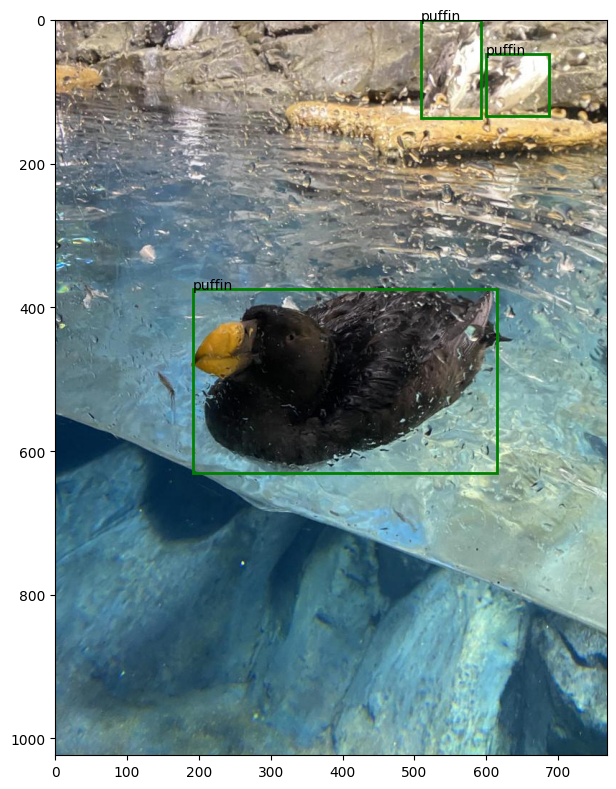

In [3]:
json_path = r'Aquarium\train\_annotations.coco.json'
with open(json_path, 'r') as file:
    json_d = json.load(file)

def display_im(im_path, json_data):
    file_name = im_path.split("\\")[-1]
    im_id = [i['id'] for i in json_data['images'] if i['file_name'] == file_name]
    box_locations = [i for i in json_data['annotations'] if i['image_id'] == im_id[0]]

    cat_mapper = {i['id']: i['name'] for i in  json_data['categories']}

    im = plt.imread(im_path)
    plt.figure(figsize=(8, 8))
    plt.imshow(im)
    for box in box_locations:
        bbox = box['bbox']
        rect = patch.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], ec = 'green', lw = 2, fill = None)
        plt.gca().add_patch(rect)
        plt.text(bbox[0], bbox[1], cat_mapper[box['category_id']])
    plt.tight_layout()
    plt.show()
display_im(r'Aquarium\train\IMG_2284_jpeg_jpg.rf.99de11cb5727748bd3eae3afe7b415e6.jpg', json_d)

In [5]:
xpath = r'Aquarium\train'
data_ = datagen.DataFlow(xpath=xpath, label_data=True)
data_ = data_.data_gen()
train_data = datagen.DataGenerator(data=data_, batch=50)
model = model.model()

file_path = 'saved_model.keras'
save_ = tf.keras.callbacks.ModelCheckpoint(file_path)

In [6]:
model.compile(optimizer = 'Adam', loss = losses.total_loss)

In [7]:
model.fit(train_data, epochs = 10, batch_size = 50, callbacks = [save_])

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 607s 31s/step - loss: 903.4564
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 538s 26s/step - loss: 71.7149
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 556s 30s/step - loss: 34.4723
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 501s 25s/step - loss: 21.9315
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 509s 26s/step - loss: 13.8776
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 525s 26s/step - loss: 5.6583
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 542s 29s/step - loss: 2.9999
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 535s 27s/step - loss: 2.3524
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 570s 32s/step - loss: 2.4046
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 516s 24s/step - loss: 2.4307


In [19]:
test_path = r'Aquarium\valid'
test_data = datagen.DataFlow(xpath=test_path, label_data=False).data_gen()
test_data = datagen.DataGenerator(data=test_data, batch=50)

In [20]:
results = model.predict(test_data)

3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 7s/step


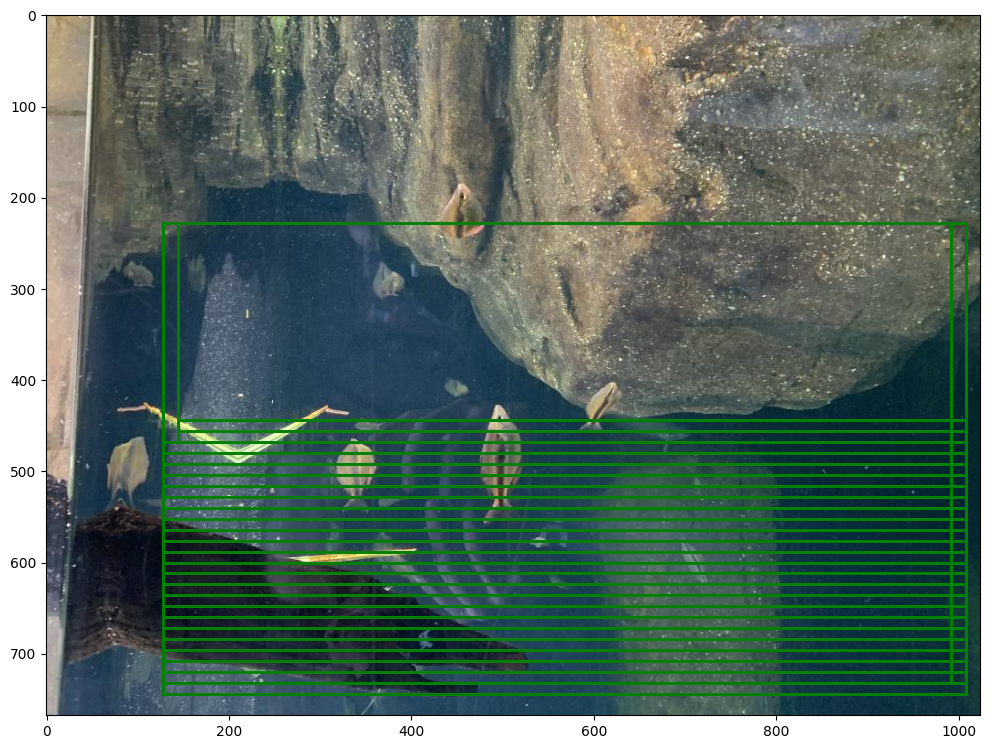

In [240]:
first_im = r'Aquarium\valid\IMG_8341_jpg.rf.a378ec2a160e3537775b7232745ef9f3.jpg'
postprocess.post_process(first_im, results[90])

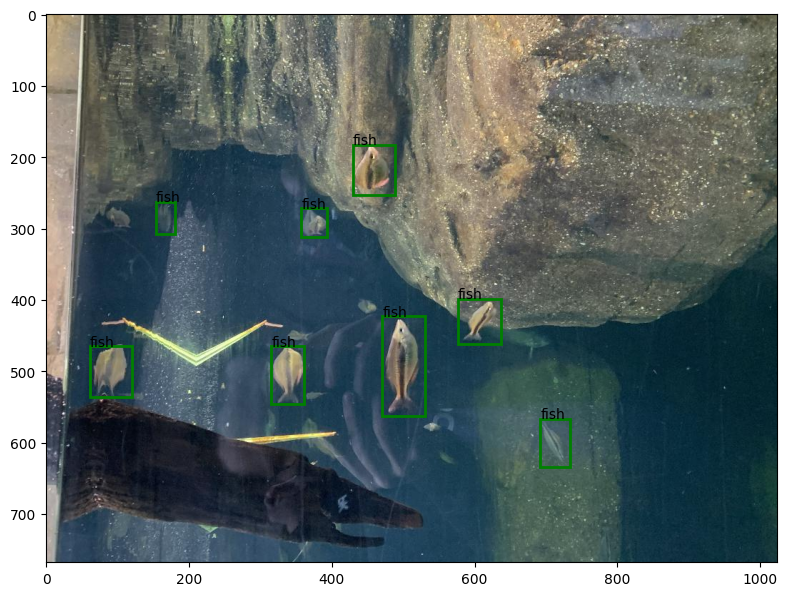

In [243]:
with open(r'Aquarium\valid\_annotations.coco.json', 'r') as valid_file:
    valid_ = json.load(valid_file)

display_im(first_im, valid_)

Ok, so predictions are garbage. But it was hardly trained, we used a less dense hourglass netwrok, and we didn't use any augmentation. Really because computation costs. What matters is that it's a working solution where logic all seems correct.